# Exercise: Training and Running Your First Model

We've learned that models are typically a mixture of mathematics and computer code that tries to process complex information into a form that is easier for us to use. Here we will train a model to guess how tall a person is, based on the size of their feet.

In the examples below, there is no need to edit any code. Try to read it, understand it, then press the run button to run it. As always with these notebooks, it is vitally important that these code blocks are run in the correct order, and nothing is missed.

## Preparing data

The first thing we do with a model is load data. We will cover this in more detail in a later exercise. For now, we will just write our data directly in our code. Review and run the code below to get started 


In [1]:
import pandas

# Make a dictionary of data for shoe sizes in cm
# and person height in cm
data = {
    'shoe_length' : [24, 18, 28, 31, 16, 34, 25, 19, 25, 33,
                    19, 29, 29, 32, 19, 25, 24, 15, 16, 33,
                    28, 18, 15, 19, 26, 24, 28, 16, 22, 31,
                    ],
    'height': [167, 148, 180, 198, 153, 207, 183, 157, 167, 188,
               152, 184, 174, 191, 164, 176, 177, 145, 171, 200,
               175, 149, 149, 149, 175, 183, 190, 172, 175, 175]
}

# Convert it into a table using pandas
dataset = pandas.DataFrame(data)

# Print the data
# In normal python we would write
# print(dataset)
# but in jupyter notebooks, if we simple write the name
# of the variable and it is printed nicely 
dataset

,shoe_length,height
0,24,167
1,18,148
2,28,180
3,31,198
4,16,153
5,34,207
6,25,183
7,19,157
8,25,167
9,33,188


As you can see, we have the sizes of shoes and heights for 30 people.

## Training our model

We will now _train_ (_fit_) our model to predict height based on the size of the shoe. We're just getting started, so we will start with a very simple model - fitting a straight line to the data. 

The code below:
* creates a simple linear regression model
* fits this to the data you have now seen
* graphs the result.

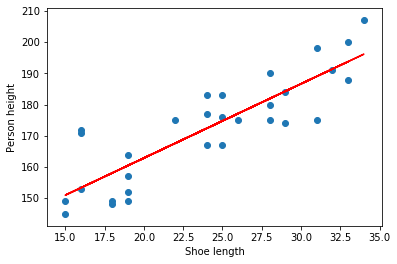

In [2]:
# Load some libraries to do the hard work for us
import matplotlib.pyplot as graph
import statsmodels.formula.api as smf
from scipy import stats

# First, we define our formula using a special syntax
# This says that height is explained by shoe length
formula = "height ~ shoe_length"

# Perform linear regression (a kind of learning) to fit a 
# line to our data. This method conducts the learning 
# process without us needing to get into the details of how
# this is performed
# We will look at how this method words in a later unit.
model = smf.ols(formula = formula, data = dataset).fit()

# Show a graph of the result
# Don't worry about how this is done for now
%matplotlib inline
train_X = dataset["shoe_length"]
intercept = model.params[0]
slope = model.params[1]
line = slope * train_X + intercept
graph.plot(train_X, line, '-', c = 'red')
graph.scatter(train_X, dataset.height)
graph.ylabel('Person height')
graph.xlabel("Shoe length")
graph.show()

The graph above shows our original data as circles, with a red line through it. The red line shows our _model_, which lets us predict a person's height from their shoe size.

For example, although we have no person with a shoe length of 20cm, we can predict that they would have a height of approximately 162cm, by looking at the red line.

We don't have to do this by eye though. We can use the model in our program to predict any height we like. Run the code below to see how we can use our model now it is trained

In [9]:
# shoe_size states the size of the shoe we are interested in 
shoe_size = { 'shoe_length' : [20] }

# Use the model to predict how tall this person is
approximate_height = model.predict(shoe_size)

# Print the result
print("Estimated Height (cm):")
print(approximate_height[0])

Estimated Height (cm):
162.8742170039976


If you would like, change the value of `20` in `shoe_size` to a new value and run the block above to see the model in action.

## Summary
Well done! You've trained your first model. We've demonstrated some topics here without detailed exaplanation in order to just get your feet wet. In later units many of these topics are explained in more detail.